# Ejemplo de Análisis Exploratorio de Datos en Python

## Entendimiento de los datos, limpieza

El archivo "DatosCorazon.csv" contiene el dataset que a analizar.

Vamos a realizar un análisis exploratorio de los datos estableciendo el baseline, verificando la calidad de los datos (tipos de las variables, valores inválidos, excepciones, valores faltantes, etc.), utilizando gráficos para poder entender las distribuciones de los datos e identificar posibles problemas.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


CARGA DE DATOS

In [3]:
df=pd.read_csv("DatosCorazon.csv",sep=";", header=None)
df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,Cleveland,63.0,1,1,145.0,233.0,1,2,150.0,0,2.3,3,0,6,0
1,Cleveland,67.0,1,4,160.0,286.0,0,2,108.0,1,1.5,2,3,3,2
2,Cleveland,67.0,1,4,120.0,229.0,0,2,129.0,1,2.6,2,2,7,1
3,Cleveland,37.0,1,3,130.0,250.0,0,0,187.0,0,3.5,3,0,3,0
4,Cleveland,41.0,0,2,130.0,204.0,0,2,172.0,0,1.4,1,0,3,0


In [4]:
colnames = ["ciudad", "edad", "sexo", "tipo_dolor", "presion", "colesterol", "azucar", "ecg", "pulso", "angina",
         "st", "pendiente", "venas", "thal", "target"]
df.columns=colnames
df.head()


,ciudad,edad,sexo,tipo_dolor,presion,colesterol,azucar,ecg,pulso,angina,st,pendiente,venas,thal,target
0,Cleveland,63.0,1,1,145.0,233.0,1,2,150.0,0,2.3,3,0,6,0
1,Cleveland,67.0,1,4,160.0,286.0,0,2,108.0,1,1.5,2,3,3,2
2,Cleveland,67.0,1,4,120.0,229.0,0,2,129.0,1,2.6,2,2,7,1
3,Cleveland,37.0,1,3,130.0,250.0,0,0,187.0,0,3.5,3,0,3,0
4,Cleveland,41.0,0,2,130.0,204.0,0,2,172.0,0,1.4,1,0,3,0


In [5]:
print(df.size)

10800


# Baseline  Global

<Axes: xlabel='target', ylabel='count'>

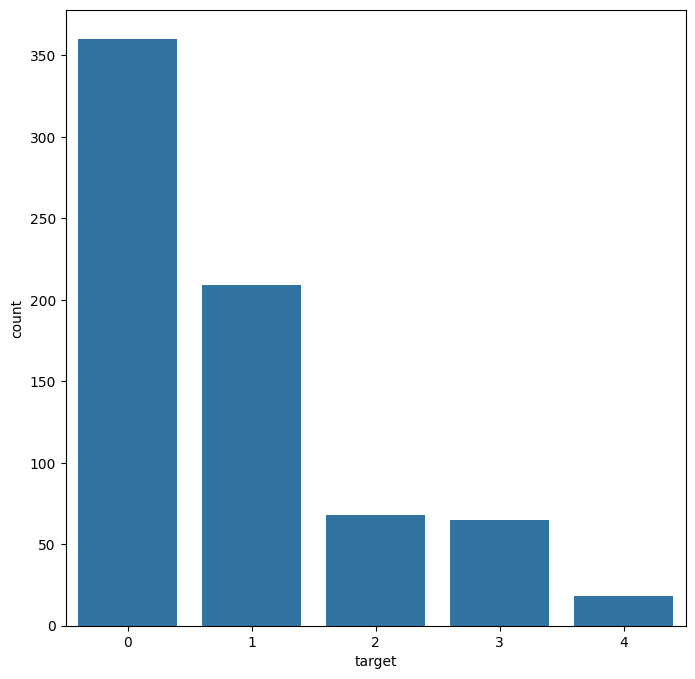

In [6]:
plt.figure(figsize=(8,8))
sns.countplot(x="target",data=df)

In [7]:
pd.crosstab(index=df["target"],columns="frecuencia")

col_0,frecuencia
target,
0,360
1,209
2,68
3,65
4,18


In [8]:
df.loc[(df.target > 0),"target"] = 1


<Axes: xlabel='target', ylabel='count'>

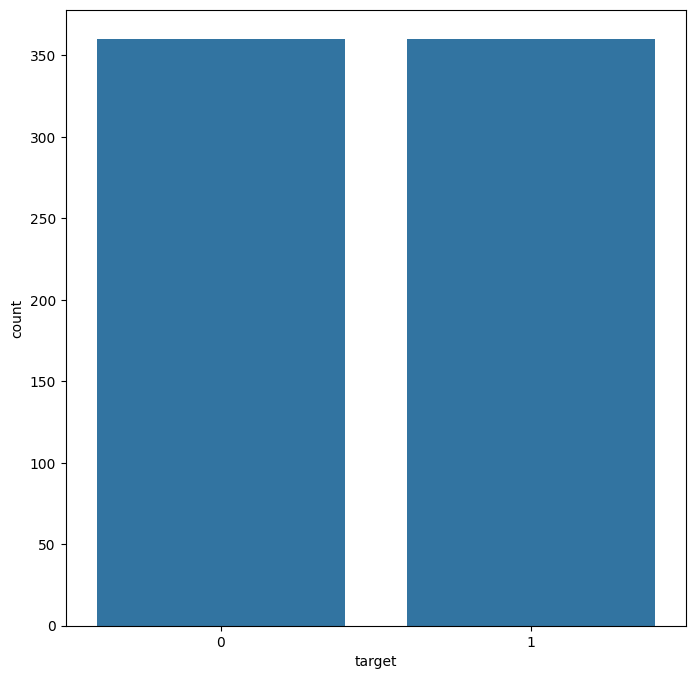

In [9]:
plt.figure(figsize=(8,8))
sns.countplot(x="target",data=df)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ciudad      720 non-null    object 
 1   edad        720 non-null    float64
 2   sexo        720 non-null    int64  
 3   tipo_dolor  720 non-null    int64  
 4   presion     720 non-null    object 
 5   colesterol  720 non-null    object 
 6   azucar      720 non-null    object 
 7   ecg         720 non-null    object 
 8   pulso       720 non-null    object 
 9   angina      720 non-null    object 
 10  st          720 non-null    object 
 11  pendiente   720 non-null    object 
 12  venas       720 non-null    object 
 13  thal        720 non-null    object 
 14  target      720 non-null    int64  
dtypes: float64(1), int64(3), object(11)
memory usage: 84.5+ KB


In [11]:
df.target=df.target.astype(str)

In [12]:
pd.crosstab(index=df["target"],columns="frecuencia")

col_0,frecuencia
target,
0,360
1,360


In [13]:
df.shape

(720, 15)

In [14]:
df["target"][df['target'] == "0"].count()/df.shape[0]*100

50.0

## Baseline por ciudad

<Axes: xlabel='ciudad', ylabel='count'>

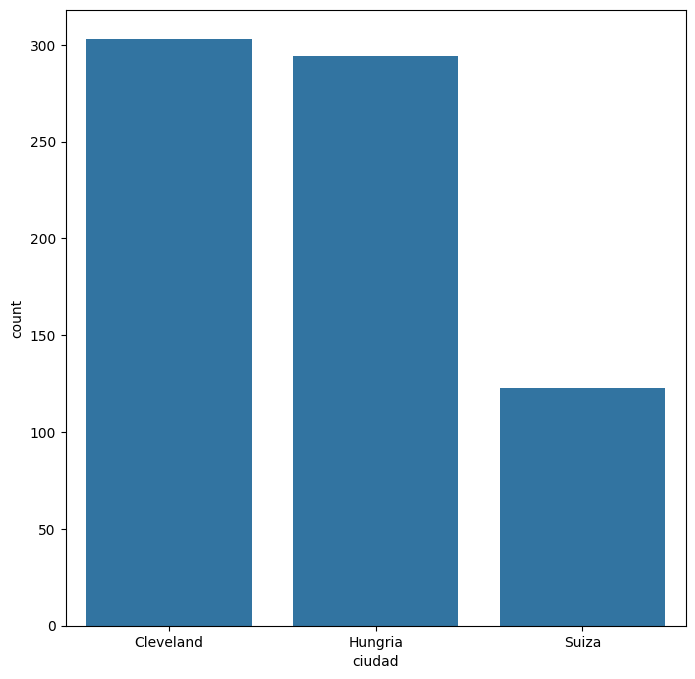

In [15]:
plt.figure(figsize=(8,8))
sns.countplot(x="ciudad",data=df)

In [16]:
pd.crosstab(index=df["ciudad"],columns="frecuencua")

col_0,frecuencua
ciudad,
Cleveland,303
Hungria,294
Suiza,123


In [17]:
dataCleveland=df[df.ciudad=="Cleveland"]
dataHungria=df[df.ciudad=="Hungria"]
dataSuiza=df[df.ciudad=="Suiza"]

In [18]:
dataCleveland["target"][dataCleveland['target']== "0"].count()/dataCleveland.shape[0]*100

54.12541254125413

<Axes: xlabel='target', ylabel='count'>

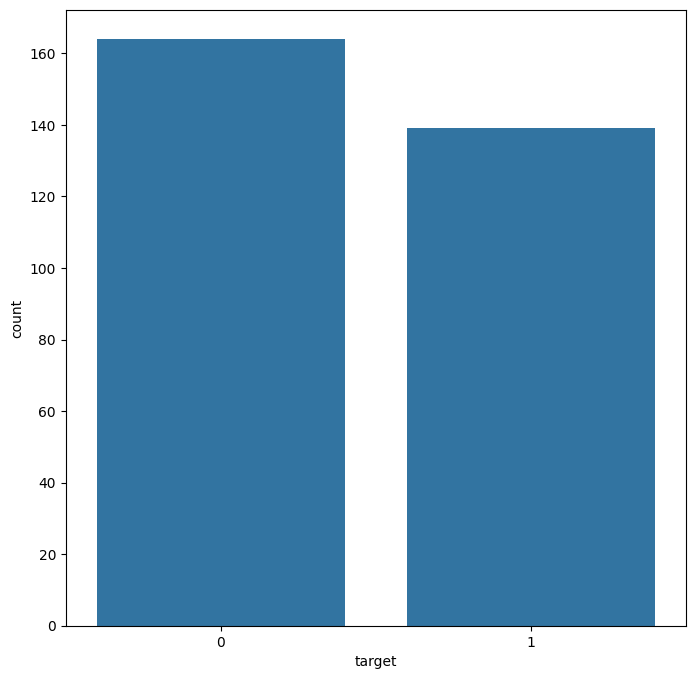

In [19]:
## clevenland
plt.figure(figsize=(8,8))
sns.countplot(x="target",data=dataCleveland)

93.4959349593496

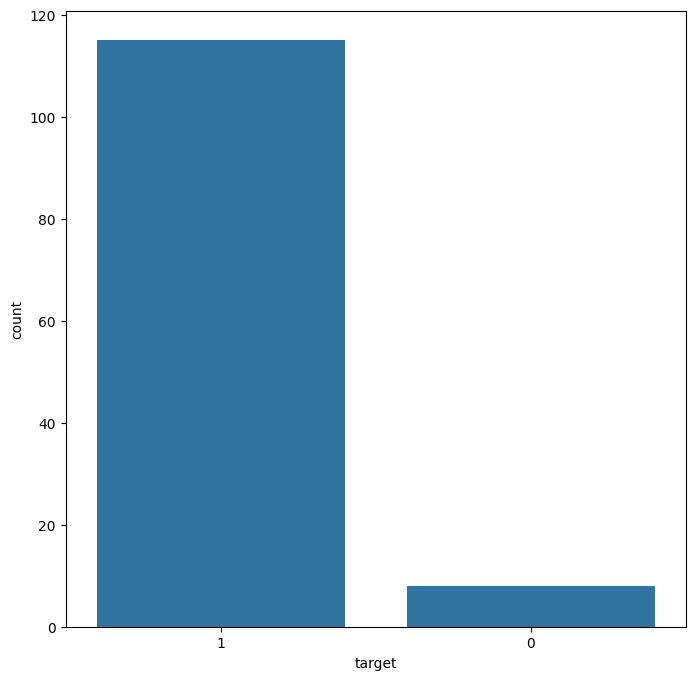

In [20]:
#suiza

plt.figure(figsize=(8,8))
sns.countplot(x="target",data=dataSuiza)

#####################
dataSuiza["target"][dataSuiza["target"]== "1"].count()/dataSuiza.shape[0]*100


36.054421768707485

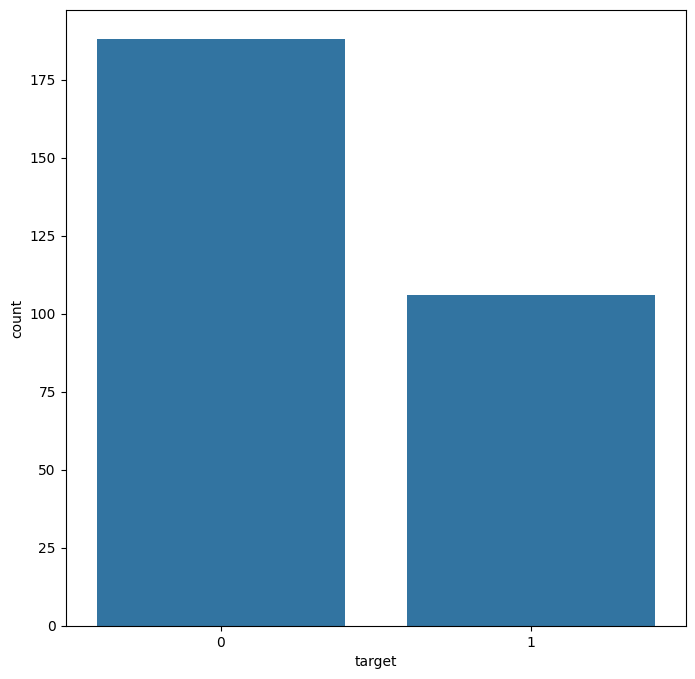

In [21]:
#suiza

plt.figure(figsize=(8,8))
sns.countplot(x="target",data=dataHungria)

#####################
dataHungria["target"][dataHungria["target"]== "1"].count()/dataHungria.shape[0]*100

## Calidad de los datos

In [22]:
df.head()

,ciudad,edad,sexo,tipo_dolor,presion,colesterol,azucar,ecg,pulso,angina,st,pendiente,venas,thal,target
0,Cleveland,63.0,1,1,145.0,233.0,1,2,150.0,0,2.3,3,0,6,0
1,Cleveland,67.0,1,4,160.0,286.0,0,2,108.0,1,1.5,2,3,3,1
2,Cleveland,67.0,1,4,120.0,229.0,0,2,129.0,1,2.6,2,2,7,1
3,Cleveland,37.0,1,3,130.0,250.0,0,0,187.0,0,3.5,3,0,3,0
4,Cleveland,41.0,0,2,130.0,204.0,0,2,172.0,0,1.4,1,0,3,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ciudad      720 non-null    object 
 1   edad        720 non-null    float64
 2   sexo        720 non-null    int64  
 3   tipo_dolor  720 non-null    int64  
 4   presion     720 non-null    object 
 5   colesterol  720 non-null    object 
 6   azucar      720 non-null    object 
 7   ecg         720 non-null    object 
 8   pulso       720 non-null    object 
 9   angina      720 non-null    object 
 10  st          720 non-null    object 
 11  pendiente   720 non-null    object 
 12  venas       720 non-null    object 
 13  thal        720 non-null    object 
 14  target      720 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 84.5+ KB


In [24]:
df.describe(include='all')

,ciudad,edad,sexo,tipo_dolor,presion,colesterol,azucar,ecg,pulso,angina,st,pendiente,venas,thal,target
count,720,720.000000,720.000000,720.000000,720,720,720,720,720,720,720,720,720,720,720
unique,3,NaN,NaN,NaN,86,307,3,4,188,3,61,6,6,6,2
top,Cleveland,NaN,NaN,NaN,120,0,0,0,150,0,0,2,?,?,0
freq,303,NaN,NaN,NaN,78,123,567,471,32,476,330,290,413,320,360
mean,NaN,51.888889,0.738889,3.179167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,9.193720,0.439546,0.953646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,28.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,45.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,53.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,58.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df.dtypes

ciudad         object
edad          float64
sexo            int64
tipo_dolor      int64
presion        object
colesterol     object
azucar         object
ecg            object
pulso          object
angina         object
st             object
pendiente      object
venas          object
thal           object
target         object
dtype: object

In [26]:
cols=["sexo","tipo_dolor"]

for col in cols:
  df[col]=df[col].astype(str)


In [27]:
df.dtypes

ciudad         object
edad          float64
sexo           object
tipo_dolor     object
presion        object
colesterol     object
azucar         object
ecg            object
pulso          object
angina         object
st             object
pendiente      object
venas          object
thal           object
target         object
dtype: object

## Limpieza de datos y tipos de columnas

In [28]:
for var in df.select_dtypes(include=['object']).columns:
  cantidad=df[df[var]== "?"][var].count()
  print(f"Existen {cantidad} valores en {var} con el valor ?")

Existen 0 valores en ciudad con el valor ?
Existen 0 valores en sexo con el valor ?
Existen 0 valores en tipo_dolor con el valor ?
Existen 3 valores en presion con el valor ?
Existen 23 valores en colesterol con el valor ?
Existen 83 valores en azucar con el valor ?
Existen 2 valores en ecg con el valor ?
Existen 2 valores en pulso con el valor ?
Existen 2 valores en angina con el valor ?
Existen 6 valores en st con el valor ?
Existen 207 valores en pendiente con el valor ?
Existen 413 valores en venas con el valor ?
Existen 320 valores en thal con el valor ?
Existen 0 valores en target con el valor ?


In [29]:
df=df.replace('?',np.nan)

In [30]:
columns = ['presion','colesterol','pulso','st']
for col in columns:
  df[col]=df[col].astype('float64')

In [31]:
df.describe(include='all')

,ciudad,edad,sexo,tipo_dolor,presion,colesterol,azucar,ecg,pulso,angina,st,pendiente,venas,thal,target
count,720,720.000000,720,720,717.000000,697.000000,637,718,718.000000,718,714.000000,513,307,400,720
unique,3,NaN,2,4,NaN,NaN,2,3,NaN,2,NaN,5,5,5,2
top,Cleveland,NaN,1,4,NaN,NaN,0,0,NaN,0,NaN,2,0,3,0
freq,303,NaN,532,365,NaN,NaN,567,471,NaN,476,NaN,290,177,190,360
mean,NaN,51.888889,NaN,NaN,131.804742,204.774749,NaN,NaN,140.565460,NaN,0.789636,NaN,NaN,NaN,NaN
std,NaN,9.193720,NaN,NaN,18.529331,109.275156,NaN,NaN,25.647172,NaN,1.066961,NaN,NaN,NaN,NaN
min,NaN,28.000000,NaN,NaN,80.000000,0.000000,NaN,NaN,60.000000,NaN,-2.600000,NaN,NaN,NaN,NaN
25%,NaN,45.000000,NaN,NaN,120.000000,182.000000,NaN,NaN,122.000000,NaN,0.000000,NaN,NaN,NaN,NaN
50%,NaN,53.000000,NaN,NaN,130.000000,227.000000,NaN,NaN,142.000000,NaN,0.200000,NaN,NaN,NaN,NaN
75%,NaN,58.000000,NaN,NaN,140.000000,270.000000,NaN,NaN,160.000000,NaN,1.500000,NaN,NaN,NaN,NaN


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ciudad      720 non-null    object 
 1   edad        720 non-null    float64
 2   sexo        720 non-null    object 
 3   tipo_dolor  720 non-null    object 
 4   presion     717 non-null    float64
 5   colesterol  697 non-null    float64
 6   azucar      637 non-null    object 
 7   ecg         718 non-null    object 
 8   pulso       718 non-null    float64
 9   angina      718 non-null    object 
 10  st          714 non-null    float64
 11  pendiente   513 non-null    object 
 12  venas       307 non-null    object 
 13  thal        400 non-null    object 
 14  target      720 non-null    object 
dtypes: float64(5), object(10)
memory usage: 84.5+ KB


In [33]:
df.head()

,ciudad,edad,sexo,tipo_dolor,presion,colesterol,azucar,ecg,pulso,angina,st,pendiente,venas,thal,target
0,Cleveland,63.0,1,1,145.0,233.0,1,2,150.0,0,2.3,3,0,6,0
1,Cleveland,67.0,1,4,160.0,286.0,0,2,108.0,1,1.5,2,3,3,1
2,Cleveland,67.0,1,4,120.0,229.0,0,2,129.0,1,2.6,2,2,7,1
3,Cleveland,37.0,1,3,130.0,250.0,0,0,187.0,0,3.5,3,0,3,0
4,Cleveland,41.0,0,2,130.0,204.0,0,2,172.0,0,1.4,1,0,3,0


In [34]:
df[df['presion'].isna()]

,ciudad,edad,sexo,tipo_dolor,presion,colesterol,azucar,ecg,pulso,angina,st,pendiente,venas,thal,target
393,Hungria,48.0,0,2,NaN,308.0,0,1,NaN,NaN,2.0,1,NaN,NaN,0
599,Suiza,35.0,1,4,NaN,0.0,NaN,0,130.0,1,NaN,NaN,NaN,7,1
714,Suiza,69.0,1,4,NaN,0.0,0,1,NaN,NaN,NaN,NaN,NaN,7,1


In [35]:
df=df[~df['presion'].isna()]

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 717 entries, 0 to 719
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ciudad      717 non-null    object 
 1   edad        717 non-null    float64
 2   sexo        717 non-null    object 
 3   tipo_dolor  717 non-null    object 
 4   presion     717 non-null    float64
 5   colesterol  694 non-null    float64
 6   azucar      635 non-null    object 
 7   ecg         715 non-null    object 
 8   pulso       717 non-null    float64
 9   angina      717 non-null    object 
 10  st          713 non-null    float64
 11  pendiente   512 non-null    object 
 12  venas       307 non-null    object 
 13  thal        398 non-null    object 
 14  target      717 non-null    object 
dtypes: float64(5), object(10)
memory usage: 89.6+ KB


In [37]:
df[df['ecg'].isna()]


,ciudad,edad,sexo,tipo_dolor,presion,colesterol,azucar,ecg,pulso,angina,st,pendiente,venas,thal,target
571,Hungria,55.0,1,1,140.0,295.0,0,NaN,136.0,0,0.0,NaN,NaN,NaN,1
598,Suiza,34.0,1,4,115.0,0.0,NaN,NaN,154.0,0,0.2,1,NaN,NaN,1


In [38]:
df=df[~df['ecg'].isna()]

In [39]:
df[df['st'].isna()]

,ciudad,edad,sexo,tipo_dolor,presion,colesterol,azucar,ecg,pulso,angina,st,pendiente,venas,thal,target
606,Suiza,38.0,1,4,150.0,0.0,NaN,0,120.0,1,NaN,NaN,NaN,3,1
636,Suiza,52.0,1,4,95.0,0.0,NaN,0,82.0,1,NaN,NaN,NaN,NaN,1
705,Suiza,65.0,1,4,145.0,0.0,NaN,1,67.0,0,NaN,NaN,NaN,6,1
707,Suiza,65.0,1,4,160.0,0.0,1,1,122.0,0,NaN,NaN,NaN,7,1


In [40]:
df=df[~df['st'].isna()]

In [41]:
df.head()

,ciudad,edad,sexo,tipo_dolor,presion,colesterol,azucar,ecg,pulso,angina,st,pendiente,venas,thal,target
0,Cleveland,63.0,1,1,145.0,233.0,1,2,150.0,0,2.3,3,0,6,0
1,Cleveland,67.0,1,4,160.0,286.0,0,2,108.0,1,1.5,2,3,3,1
2,Cleveland,67.0,1,4,120.0,229.0,0,2,129.0,1,2.6,2,2,7,1
3,Cleveland,37.0,1,3,130.0,250.0,0,0,187.0,0,3.5,3,0,3,0
4,Cleveland,41.0,0,2,130.0,204.0,0,2,172.0,0,1.4,1,0,3,0


In [42]:
df.head()

,ciudad,edad,sexo,tipo_dolor,presion,colesterol,azucar,ecg,pulso,angina,st,pendiente,venas,thal,target
0,Cleveland,63.0,1,1,145.0,233.0,1,2,150.0,0,2.3,3,0,6,0
1,Cleveland,67.0,1,4,160.0,286.0,0,2,108.0,1,1.5,2,3,3,1
2,Cleveland,67.0,1,4,120.0,229.0,0,2,129.0,1,2.6,2,2,7,1
3,Cleveland,37.0,1,3,130.0,250.0,0,0,187.0,0,3.5,3,0,3,0
4,Cleveland,41.0,0,2,130.0,204.0,0,2,172.0,0,1.4,1,0,3,0


In [43]:
df.drop(columns=['venas','pendiente','thal'],inplace=True)

In [44]:
pd.crosstab(index=df['azucar'],columns='count')

col_0,count
azucar,
0,564
1,69


In [45]:
df.loc[df['azucar'].isna(),'azucar'] = -1


In [46]:
pd.crosstab(index=df['azucar'],columns="frecuensia")

col_0,frecuensia
azucar,
-1,78
0,564
1,69


In [47]:
df.loc[df['colesterol'].isna(),'colesterol']=df['colesterol'].mean()

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 711 entries, 0 to 719
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ciudad      711 non-null    object 
 1   edad        711 non-null    float64
 2   sexo        711 non-null    object 
 3   tipo_dolor  711 non-null    object 
 4   presion     711 non-null    float64
 5   colesterol  711 non-null    float64
 6   azucar      711 non-null    object 
 7   ecg         711 non-null    object 
 8   pulso       711 non-null    float64
 9   angina      711 non-null    object 
 10  st          711 non-null    float64
 11  target      711 non-null    object 
dtypes: float64(5), object(7)
memory usage: 72.2+ KB


# Excepciones 

In [49]:
df.head()

,ciudad,edad,sexo,tipo_dolor,presion,colesterol,azucar,ecg,pulso,angina,st,target
0,Cleveland,63.0,1,1,145.0,233.0,1,2,150.0,0,2.3,0
1,Cleveland,67.0,1,4,160.0,286.0,0,2,108.0,1,1.5,1
2,Cleveland,67.0,1,4,120.0,229.0,0,2,129.0,1,2.6,1
3,Cleveland,37.0,1,3,130.0,250.0,0,0,187.0,0,3.5,0
4,Cleveland,41.0,0,2,130.0,204.0,0,2,172.0,0,1.4,0


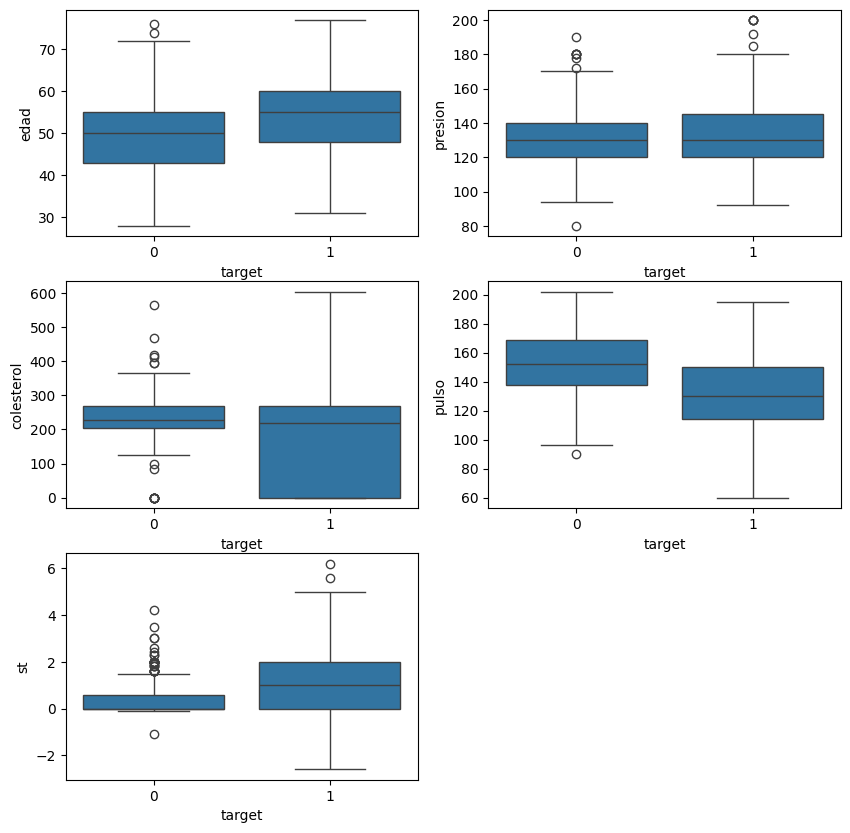

In [50]:
cols = ['edad','presion','colesterol','pulso','st']
i=1
plt.figure(figsize=(10,10))
for col in cols:
    plt.subplot(3,2,i)
    sns.boxplot(x='target',y=col,data=df)
    i += 1

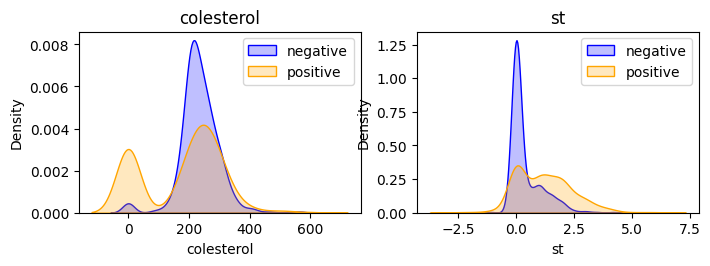

In [51]:
cols=['colesterol','st']
plt.figure(figsize=(8,8))
i=1
for col in cols:
  plt.subplot(3,2,i)
  sns.kdeplot(df[df.target=='0'][col],shade=True,color='blue')
  sns.kdeplot(df[df.target=='1'][col],shade=True,color='orange')
  plt.legend(['negative','positive'])
  plt.title(col)
  i+=1

In [52]:
upper_bouns={}
lower_bound={}
cols=['edad','presion','colesterol','pulso','st']

for col in  cols :
  values=df[col]
  upper_bouns[col]=values.mean()+4*values.std()
  lower_bound[col]=values.mean()-4*values.std()


In [53]:
upper_bouns

{'edad': 88.45744757123418,
 'presion': 205.75839901058941,
 'colesterol': 631.0778795790743,
 'pulso': 242.80700631024945,
 'st': 5.060301277956009}

In [54]:
for col in cols:
    values=df[col]
    if(df[values>upper_bouns[col]][col].count() > 0):
        print(df[values>upper_bouns[col]][col])
    if(df[values<lower_bound[col]][col].count() > 0):
        print(df[values<lower_bound[col]][col])

91     6.2
123    5.6
Name: st, dtype: float64


In [55]:
df.dtypes

ciudad         object
edad          float64
sexo           object
tipo_dolor     object
presion       float64
colesterol    float64
azucar         object
ecg            object
pulso         float64
angina         object
st            float64
target         object
dtype: object

In [56]:
df.head()

,ciudad,edad,sexo,tipo_dolor,presion,colesterol,azucar,ecg,pulso,angina,st,target
0,Cleveland,63.0,1,1,145.0,233.0,1,2,150.0,0,2.3,0
1,Cleveland,67.0,1,4,160.0,286.0,0,2,108.0,1,1.5,1
2,Cleveland,67.0,1,4,120.0,229.0,0,2,129.0,1,2.6,1
3,Cleveland,37.0,1,3,130.0,250.0,0,0,187.0,0,3.5,0
4,Cleveland,41.0,0,2,130.0,204.0,0,2,172.0,0,1.4,0


In [57]:
df['presion'].unique()

array([145., 160., 120., 130., 140., 172., 150., 110., 132., 117., 135.,
       112., 105., 124., 125., 142., 128., 170., 155., 104., 180., 138.,
       108., 134., 122., 115., 118., 100., 200.,  94., 165., 102., 152.,
       101., 126., 174., 148., 178., 158., 192., 129., 144., 123., 136.,
       146., 106., 156., 154., 114., 164.,  98., 190., 113.,  92.,  95.,
        80., 185.])

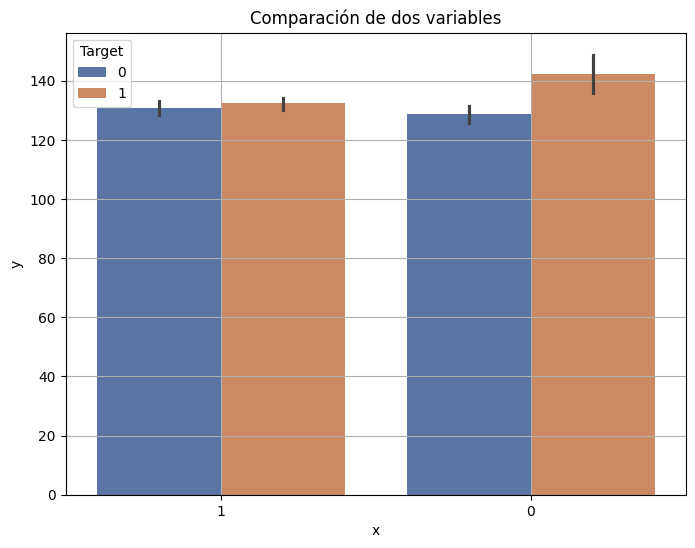

In [58]:
# Graficar un gráfico de línea comparando dos variables ('step' y 'position')
plt.figure(figsize=(8, 6))
sns.barplot(x='sexo', y='presion',hue='target',palette="deep", data=df)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparación de dos variables')
plt.legend(title='Target')
plt.grid(True)
plt.show()


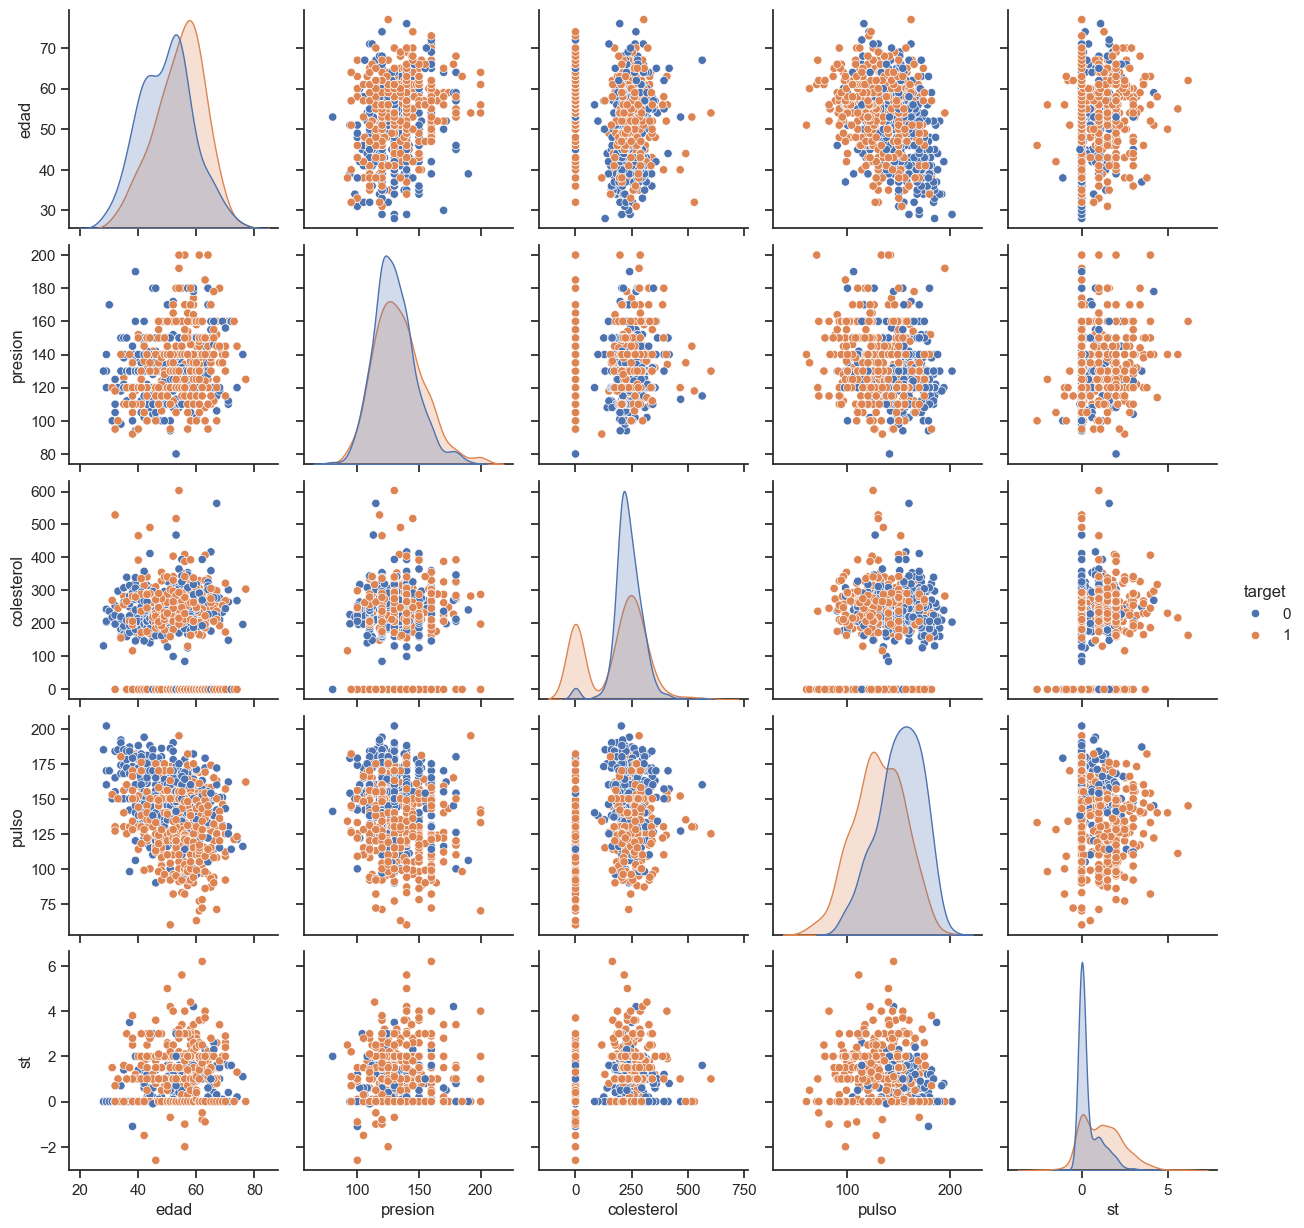

In [59]:
sns.set_theme(style="ticks")
sns.pairplot(df,hue='target')